In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

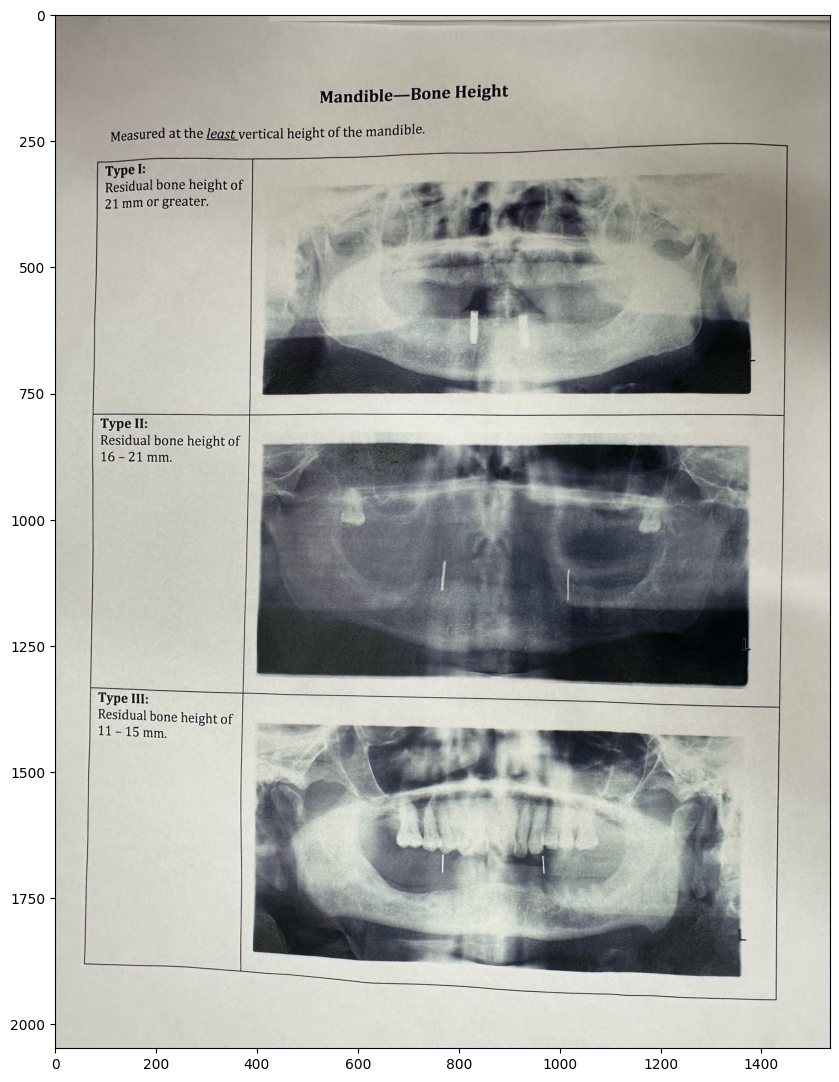

In [2]:
plt.figure(figsize=(10, 20))
doc = plt.imread("./dataset/raw/mandible-bone-height.jpeg")
plt.imshow(doc)
plt.show()

## Cropping

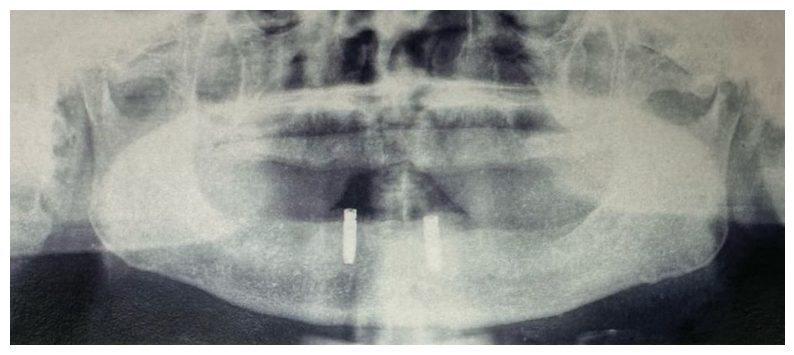

In [3]:
img1 = doc[350:750, 425:1350]
plt.figure(figsize=(10, 5))
plt.imshow(img1)
plt.axis("off")
plt.imsave("./dataset/raw/sample1.jpg", img1)
plt.show()

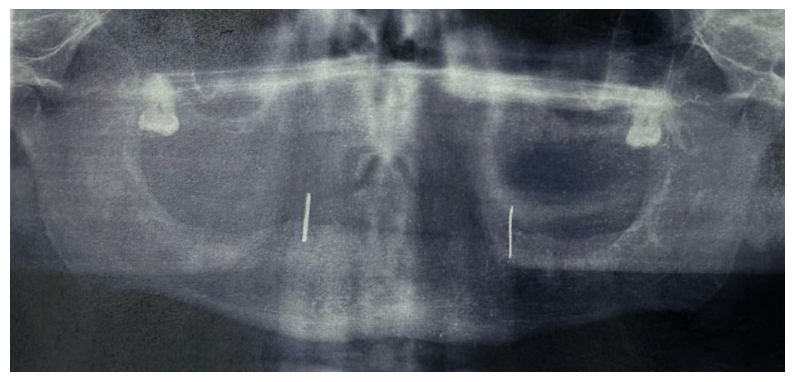

In [4]:
img2 = doc[860:1300, 410:1350]
plt.figure(figsize=(10, 5))
plt.imshow(img2)
plt.axis("off")
plt.imsave("./dataset/raw/sample2.jpg", img2)
plt.show()

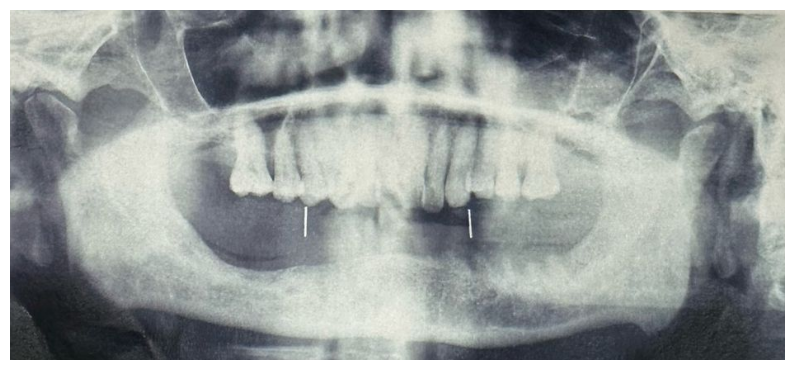

In [5]:
img3 = doc[1425:1850, 410:1350]
plt.figure(figsize=(10, 5))
plt.imshow(img3)
plt.axis("off")
plt.imsave("./dataset/raw/sample3.jpg", img3)
plt.show()

## Canny

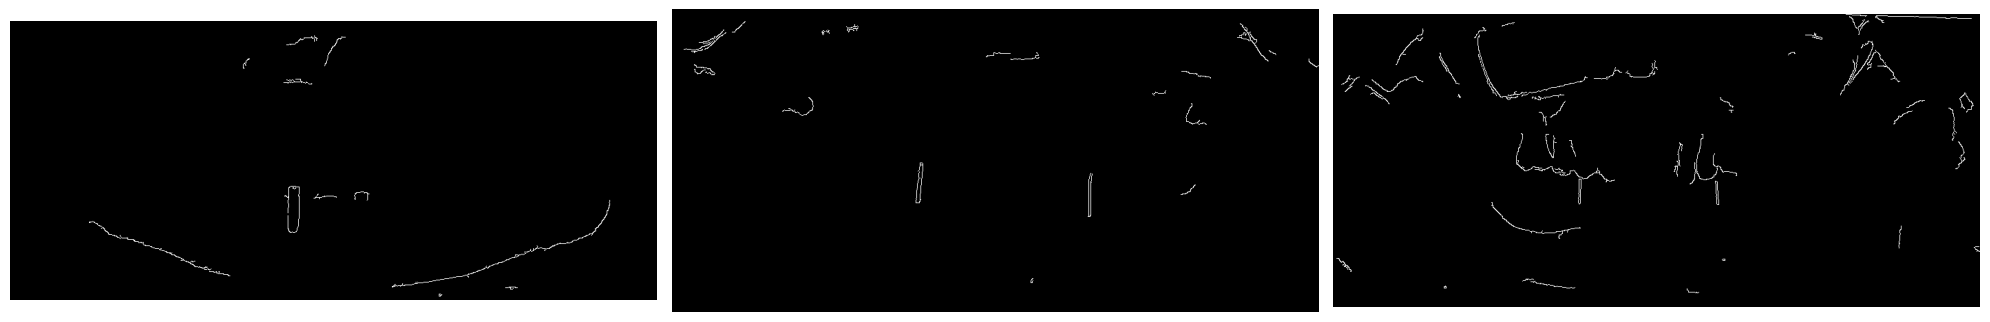

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 30))

edges = [cv.Canny(img1, 100, 255), cv.Canny(img2, 100, 255), cv.Canny(img3, 100, 255)]

for edge, ax in zip(edges, axes):
    ax.imshow(edge, cmap="gray")
    ax.axis("off")

fig.tight_layout()

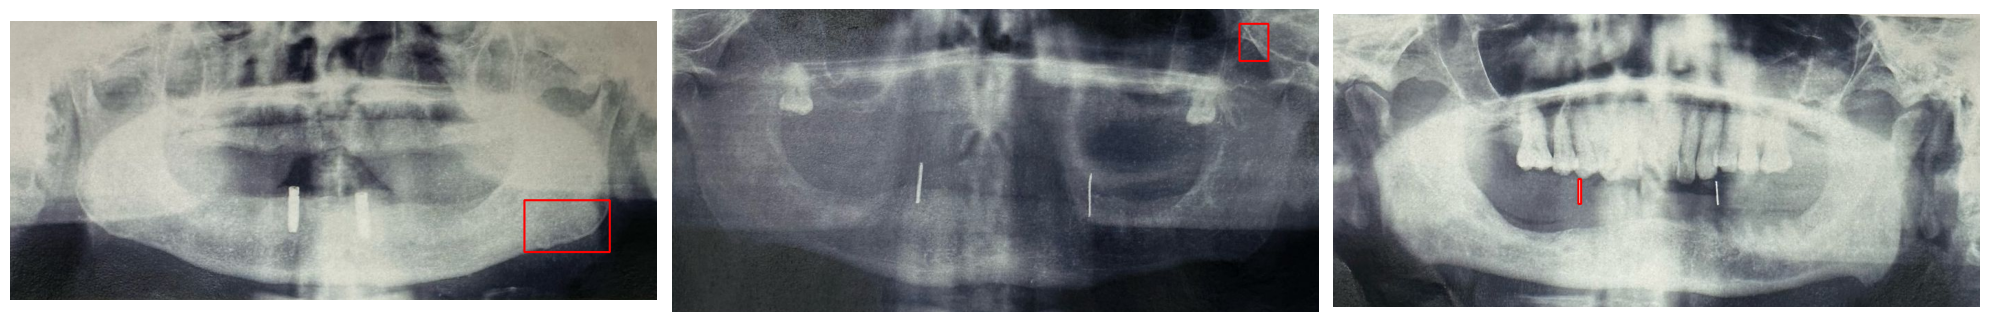

In [7]:
contours_hierarchy = [cv.findContours(edge, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) for edge in edges]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 30))

for edge, img, ax in zip(contours_hierarchy, [img1, img2, img3], axes):
    image = img.copy()
    contours, hierarchy = edge
    c = max(contours, key=cv.contourArea)
    c = c.reshape(c.shape[0], 2)
    p1 = (c.T[0].min(), c.T[1].min())
    p2 = (c.T[0].max(), c.T[1].max())
    cv.rectangle(image, (c.T[0].min(), c.T[1].min()), (c.T[0].max(), c.T[1].max()), (255, 0, 0), 2)
    ax.imshow(image)
    ax.axis("off")

fig.tight_layout()

## Blur Canny

In [8]:
def guassian_blur(img):
    return cv.GaussianBlur(img, (3, 3), 0)
    
blur_imgs = [guassian_blur(img) for img in [img1, img2, img3]]

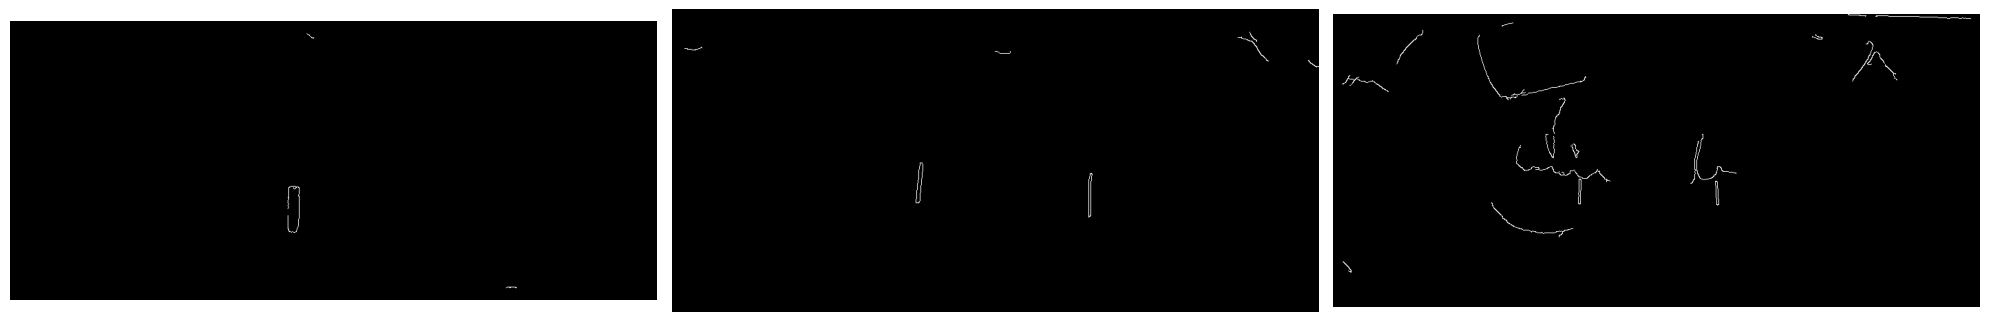

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 30))

blur_edges = [cv.Canny(img, 100, 255) for img in blur_imgs]

for edge, ax in zip(blur_edges, axes):
    ax.imshow(edge, cmap="gray")
    ax.axis("off")

fig.tight_layout()

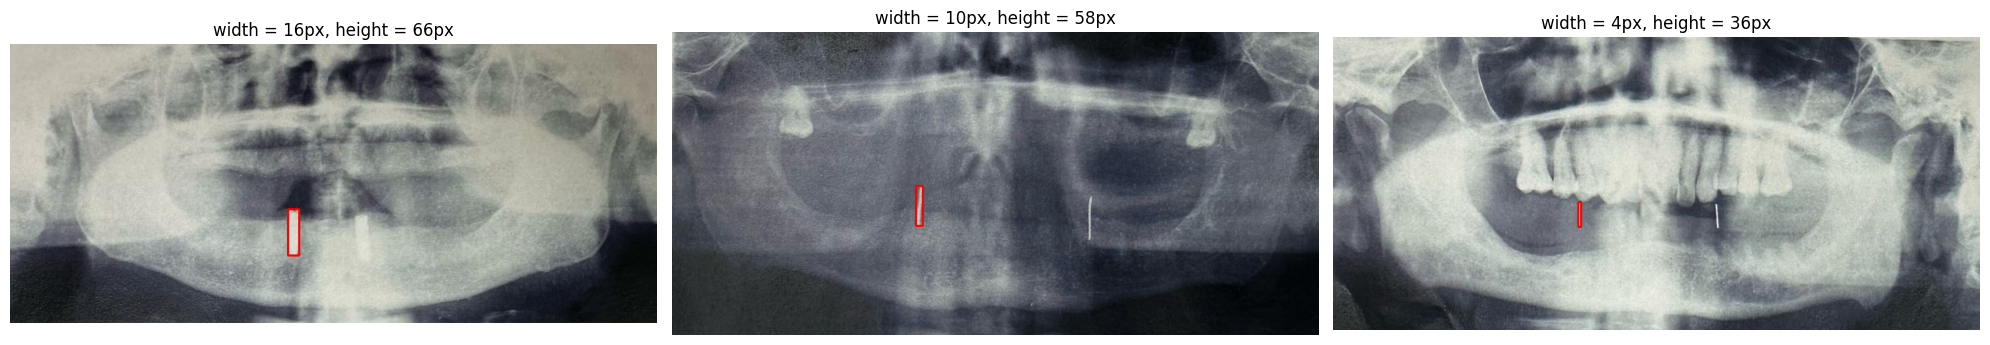

In [10]:
contours_hierarchy = [cv.findContours(edge, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) for edge in blur_edges]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 40))

for edge, img, ax in zip(contours_hierarchy, [img1, img2, img3], axes):
    image = img.copy()
    contours, hierarchy = edge
    c = max(contours, key=cv.contourArea)
    c = c.reshape(c.shape[0], 2)
    p1 = (c.T[0].min(), c.T[1].min())
    p2 = (c.T[0].max(), c.T[1].max())
    cv.rectangle(image, (c.T[0].min(), c.T[1].min()), (c.T[0].max(), c.T[1].max()), (255, 0, 0), 2)
    ax.imshow(image)
    ax.set_title(f"width = {c.T[0].max() - c.T[0].min()}px, height = {c.T[1].max() - c.T[1].min()}px")
    ax.axis("off")

fig.tight_layout()

## CLAHE Histogram Equalization

In [11]:
clahe = cv.createCLAHE(clipLimit=5.0, tileGridSize=(5, 5))
images = [img1, img2, img3]
gray_images = [cv.cvtColor(img, cv.COLOR_BGR2GRAY) for img in images]

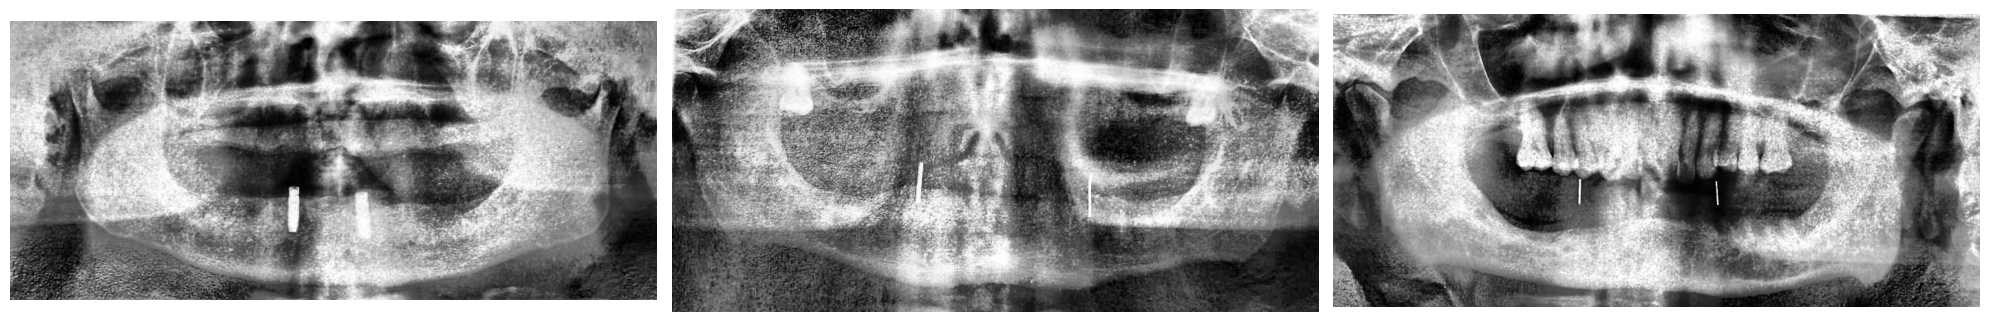

In [12]:
eq_imgs = [clahe.apply(img) for img in gray_images]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 40))

for img, ax in zip(eq_imgs, axes):
    ax.imshow(img, cmap="gray")
    ax.axis("off")

fig.tight_layout()

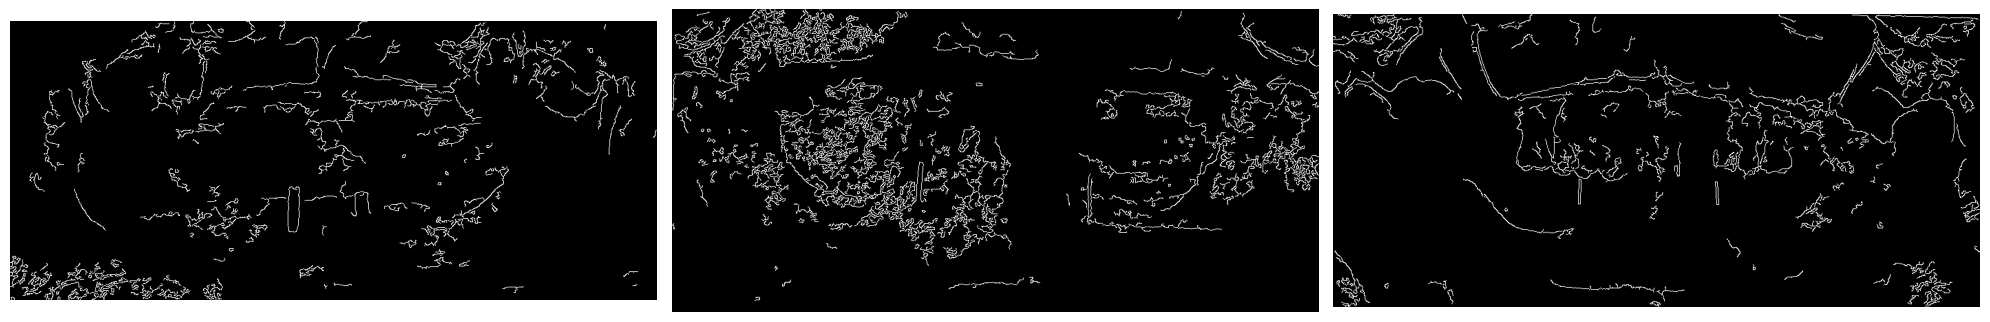

In [13]:
eq_blur = [cv.GaussianBlur(img, (3, 3), 10) for img in eq_imgs]
eq_cannies = [cv.Canny(img, 100, 255) for img in eq_blur]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 40))

for img, ax in zip(eq_cannies, axes):
    ax.imshow(img, cmap="gray")
    ax.axis("off")

fig.tight_layout()

## Dataset without bite-wings

In [14]:
import os

samples = [(plt.imread(f"./dataset/img/{img}") * 255).astype(np.uint8) for img in os.listdir("./dataset/img")[:3]]

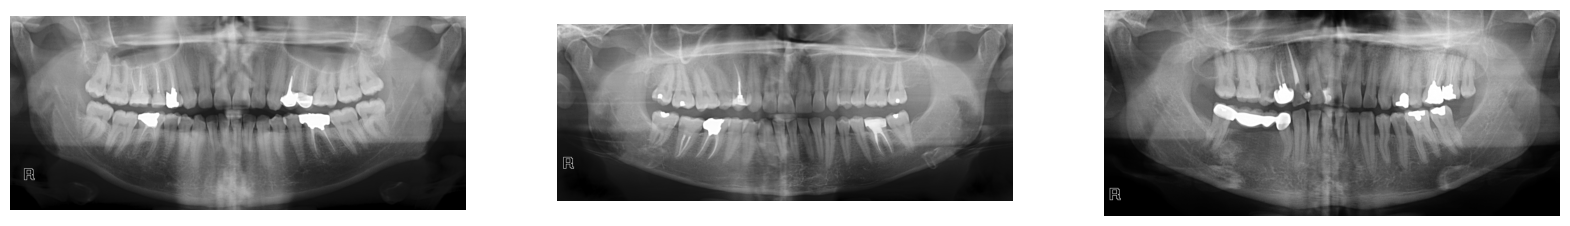

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 40))

for img, ax in zip(samples, axes):
    ax.imshow(img, cmap="gray")
    ax.axis("off")

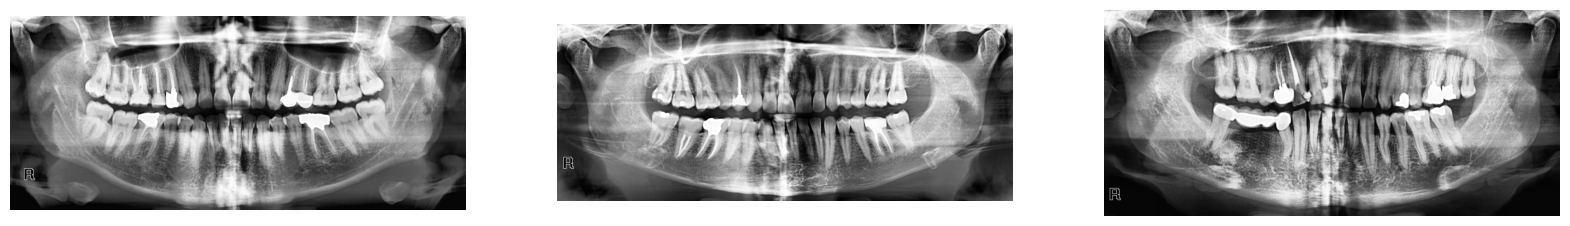

In [16]:
eq_imgs = [clahe.apply(img) for img in samples]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 30))

for img, ax in zip(eq_imgs, axes):
    ax.imshow(img, cmap="gray")
    ax.axis("off")

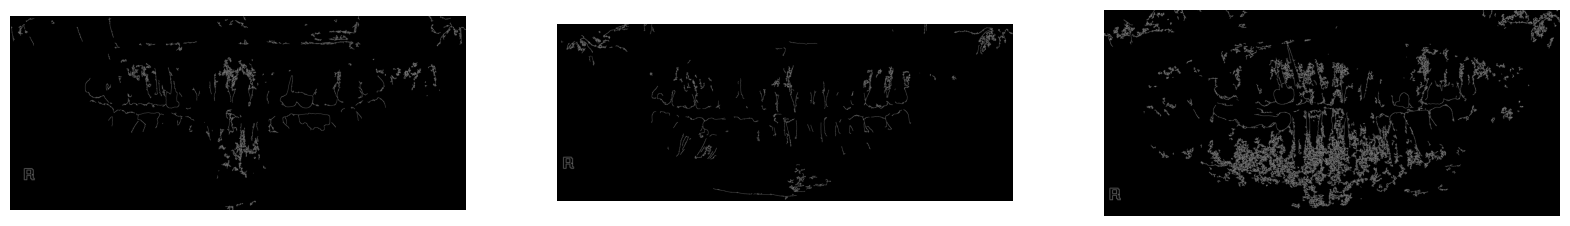

In [17]:
eq_imgs = [clahe.apply(img) for img in samples]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 30))

for img, ax in zip(eq_imgs, axes):
    ax.imshow(cv.Canny(img, 70, 255), cmap="gray")
    ax.axis("off")
